In [2]:
import pandas as pd
import numpy as np

In [5]:
#Let's read csv file for the data
df = pd.read_csv("cleaned_cx_data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          49 non-null     int64  
 1   date_of_interaction  49 non-null     object 
 2   issue_category       49 non-null     object 
 3   time_spent_minutes   49 non-null     float64
 4   resolution_status    49 non-null     object 
 5   day_of_week          49 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.4+ KB


In [7]:
df["date_of_interaction"] = pd.to_datetime(df['date_of_interaction'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          49 non-null     int64         
 1   date_of_interaction  49 non-null     datetime64[ns]
 2   issue_category       49 non-null     object        
 3   time_spent_minutes   49 non-null     float64       
 4   resolution_status    49 non-null     object        
 5   day_of_week          49 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.4+ KB


In [27]:
df.head()

,customer_id,date_of_interaction,issue_category,time_spent_minutes,resolution_status,day_of_week
0,1,2024-01-15,Account,15.00,Resolved,Monday
1,3,2024-01-17,Technical,33.04,Resolved,Wednesday
2,4,2024-01-18,Account,10.00,Resolved,Thursday
3,5,2024-01-19,Technical,60.00,Unresolved,Friday
4,6,2024-01-20,Billing,33.04,Resolved,Saturday


In [28]:
#lets group and resample data weekly
df = df.set_index('date_of_interaction')
weekly_avg = df.resample('W')['time_spent_minutes'].mean()
weekly_index = weekly_avg.index.to_list()

In [29]:
#lets group and resample data monthly

monthly_avg = df.resample('ME')['time_spent_minutes'].mean()
monthly_index = monthly_avg.index.to_list()

In [30]:
# Let's import libraries to start the visualization
import matplotlib.pyplot as plt
%matplotlib inline

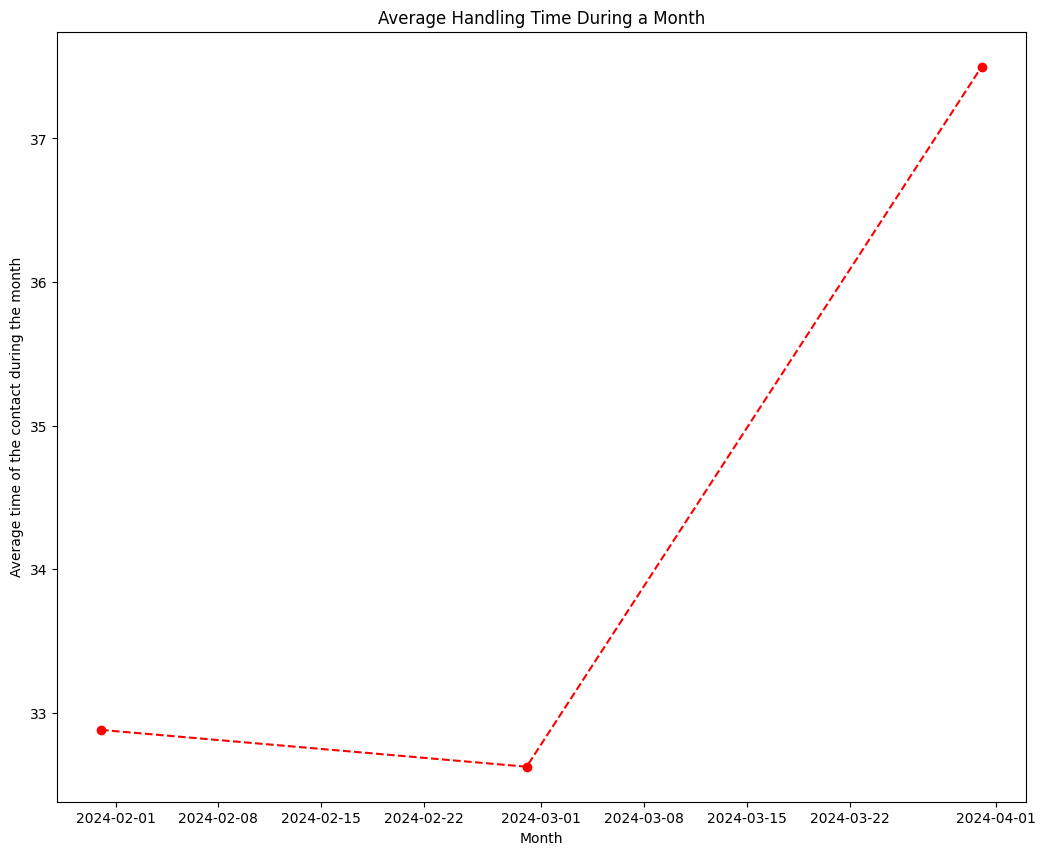

In [31]:
#now let's visualize the monthly results
plt.figure(figsize = (12.5, 10))
plt.plot(monthly_avg.index, monthly_avg, marker = 'o',
        linestyle='--',color = 'red')
plt.xlabel("Month")
plt.ylabel("Average time of the contact during the month")
plt.title("Average Handling Time During a Month")
plt.show()

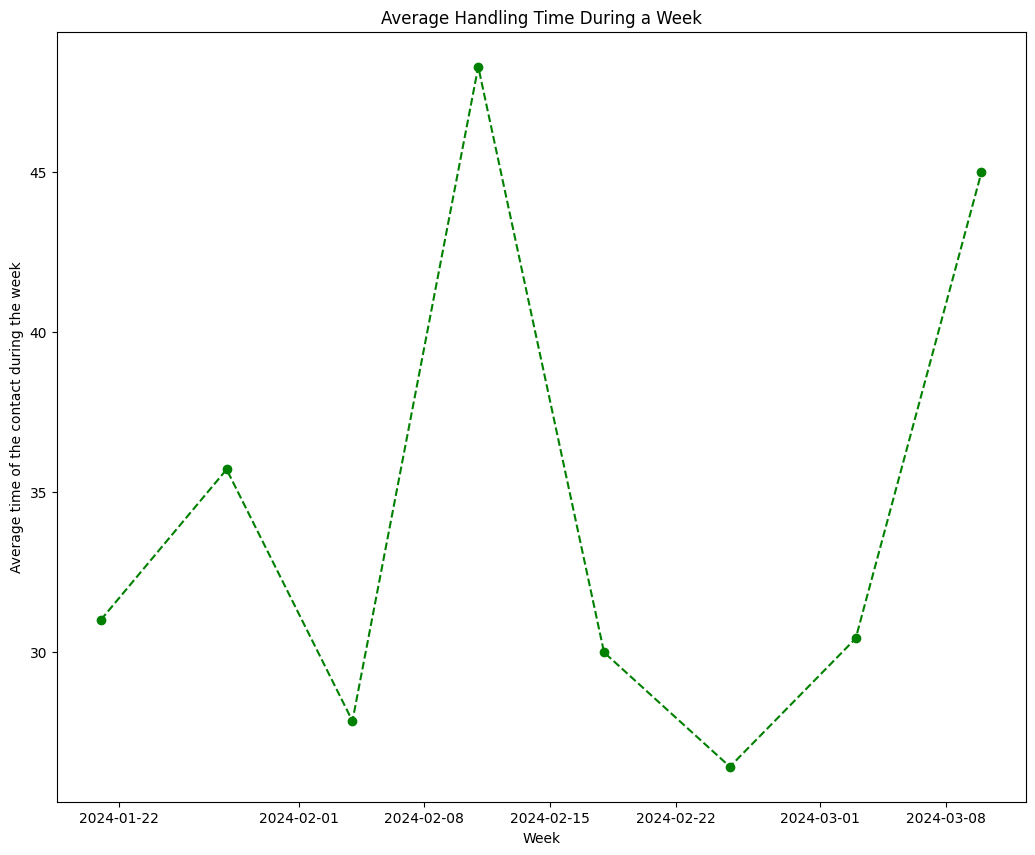

In [32]:
#now let's visualize the weekly results
plt.figure(figsize = (12.5, 10))
plt.plot(weekly_avg.index, weekly_avg, marker = 'o',
        linestyle='--',color = 'green')
plt.xlabel("Week")
plt.ylabel("Average time of the contact during the week")
plt.title("Average Handling Time During a Week")
plt.show()

In [33]:
#Since there was a peak weak, let's explore each week's / month's most common issue category

weekly_mode = df.resample('W').agg(lambda x: x.mode()[0] if not x.mode().empty else None)
monthly_mode = df.resample('ME').agg(lambda x: x.mode()[0] if not x.mode().empty else None)

In [34]:
#weekly_mode = weekly_mode.drop(columns = ["customer_id", "time_spent_minutes", "resolution_status", "day_of_week"])
weekly_mode

,customer_id,issue_category,time_spent_minutes,resolution_status,day_of_week
date_of_interaction,,,,,
2024-01-21,1,Account,33.04,Resolved,Friday
2024-01-28,8,Account,5.00,Resolved,Friday
2024-02-04,15,Billing,10.00,Resolved,Friday
2024-02-11,22,Account,15.00,Resolved,Friday
2024-02-18,29,Billing,10.00,Resolved,Friday
2024-02-25,36,Account,5.00,Resolved,Friday
2024-03-03,43,Billing,15.00,Resolved,Friday
2024-03-10,50,Account,45.00,Unresolved,Monday


In [36]:
# Count the occurrences of the mode in each week
weekly_counts = df.groupby(['issue_category']).resample('W').size().unstack(fill_value=0)


In [101]:
weekly_counts

date_of_interaction,2024-01-21,2024-01-28,2024-02-04,2024-02-11,2024-02-18,2024-02-25,2024-03-03,2024-03-10
issue_category,,,,,,,,
Account,2,2,1,2,1,2,1,1
Billing,1,2,2,1,3,2,2,0
Support,1,1,2,2,1,2,2,0
Technical,2,2,2,2,2,1,2,0


In [106]:
monthly_counts = df.groupby(['issue_category']).resample('ME').size().unstack(fill_value=0)

monthly_counts

date_of_interaction,2024-01-31,2024-02-29,2024-03-31
issue_category,,,
Account,4,7,1
Billing,4,8,1
Support,3,7,1
Technical,5,7,1
